In [1]:
# Logic
from ml import get_data_from_files

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score
from matplotlib import pyplot as plt


# Get Data 

In [2]:
X, y = get_data_from_files()

[Errno 2] No such file or directory: '../data/orange_100_balanced_with_load_electric_fault.csv'
[Errno 2] No such file or directory: '../data/orange_100_unbalanced_no_load_electric_fault.csv'


In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True)
print(X.shape)

(1586, 21)


# Scaler

In [61]:
# MIN MAX SCALER

# Scale data
# POur pas avoir qui prennent trop d'importance par rapport à d'autres
scaler = MinMaxScaler()
scaler.fit(X_train)

# Apply scaler for train and test data
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [4]:
# AA

std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

# Prepare model

In [5]:
model = DecisionTreeClassifier()
grid = {
    "criterion": ["entropy"],
    "splitter": ["best", "random"],
    "max_depth": [None, 1, 2, 4, 8, 12],
    "min_samples_split": [1, 2, 4, 8],
    "min_samples_leaf": [1, 2, 4, 8],
}

skf = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)

grid_search = GridSearchCV(model, grid, scoring="accuracy", refit=True, verbose=True, n_jobs=-1, cv=skf) # -1 takes all cores
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
/home/lfridez/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.89233769 0.89066766 0.88307981 0.90243946
 0.88813956 0.87974684        nan        nan 0.88646598 0.89319931
 0.88393788 0.87971847 0.89319931 0.88817147        nan        nan
 0.88646952 0.82252243 0.87722228 0.86461015 0.88646243 0.85368223
        nan        nan 0.86123817 0.81411907 0.85450839 0.8074212
 0.85702585 0.84524341        nan        nan 0.27249583 0.26408893
 0.27249583 0.26660994 0.27249583 0.26072758        nan        nan
 0.27249583 0.26156792 0.27249583 0.26745027 0.27249583 0.26492926
        nan        nan 0.27249583 0.26661348 0.27249583 0.26660639
 0.27249583 0.25733433        nan        nan 0.27249583 0.26492926
 0.27249583 0.26492926 0.27249583 0.26660639        nan        nan
 0.40284012 0.38520725 0.40284012 0.36335851 0.40284

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'],
                         'max_depth': [None, 1, 2, 4, 8, 12],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [1, 2, 4, 8],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=True)

# Results

Train's score : 0.9873843566021867
Test's score : 0.9093198992443325
Best hyper-parameter : {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        51
           1       0.95      0.98      0.96        55
           2       0.90      0.88      0.89        52
           3       1.00      0.96      0.98        48
           4       0.90      0.85      0.87        53
           5       0.89      0.82      0.86        40
           6       0.88      0.86      0.87        43
           7       0.91      0.95      0.93        55

    accuracy                           0.91       397
   macro avg       0.91      0.91      0.91       397
weighted avg       0.91      0.91      0.91       397



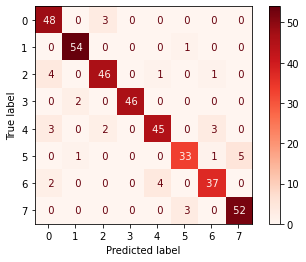

In [6]:
print(f"Train's score : {grid_search.score(X_train, y_train)}")
print(f"Test's score : {accuracy_score(y_test, grid_search.predict(X_test))}")
print(f"Best hyper-parameter : {grid_search.best_params_}")

print(classification_report(y_test, grid_search.predict(X_test)))

plot_confusion_matrix(grid_search, X_test, y_test, cmap=plt.cm.Reds, values_format="3.0f")